In [2]:
import pandas as pd
from prophet import Prophet

In [52]:
## Seller 의 월별 매출을 Parameter 로 받은 후 DataFrame 로 변경
# {ds = datetime, y = value}
df = pd.DataFrame({"ds" : ['2022-6', '2022-7', '2022-8', '2022-9', '2022-10'], "y" : [9.590761, 8.519590, 8.183677, 8.072467, 7.893572]})

In [53]:
df

,ds,y
0,2022-6,9.590761
1,2022-7,8.519590
2,2022-8,8.183677
3,2022-9,8.072467
4,2022-10,7.893572


In [5]:
m = Prophet() # Prophet 선언
m.fit() # DataFrame

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.



Initial log joint probability = -5.91337
Iteration  1. Log joint probability =    4.69978. Improved by 10.6132.
Iteration  2. Log joint probability =    11.5325. Improved by 6.83271.
Iteration  3. Log joint probability =    14.2436. Improved by 2.71109.
Iteration  4. Log joint probability =    15.3282. Improved by 1.08463.
Iteration  5. Log joint probability =    15.3671. Improved by 0.038947.
Iteration  6. Log joint probability =    15.3699. Improved by 0.00277611.
Iteration  7. Log joint probability =    15.3713. Improved by 0.00141516.
Iteration  8. Log joint probability =    15.3729. Improved by 0.00152759.
Iteration  9. Log joint probability =    15.3729. Improved by 2.66129e-05.
Iteration 10. Log joint probability =    15.3729. Improved by 5.95977e-06.
Iteration 11. Log joint probability =    15.3729. Improved by 5.82627e-06.
Iteration 12. Log joint probability =    15.3729. Improved by 5.29422e-06.
Iteration 13. Log joint probability =    15.3729. Improved by 6.49064e-06.
Itera

bability =    15.3731. Improved by 2.18836e-06.
Iteration 82. Log joint probability =    15.3731. Improved by 5.86955e-07.
Iteration 83. Log joint probability =    15.3731. Improved by 2.35411e-06.
Iteration 84. Log joint probability =    15.3731. Improved by 4.21148e-07.
Iteration 85. Log joint probability =    15.3731. Improved by 2.51985e-06.
Iteration 86. Log joint probability =    15.3731. Improved by 2.55347e-07.
Iteration 87. Log joint probability =    15.3731. Improved by 2.68559e-06.
Iteration 88. Log joint probability =    15.3731. Improved by 8.95527e-08.
Iteration 89. Log joint probability =    15.3731. Improved by 2.85131e-06.
Iteration 90. Log joint probability =    15.3731. Improved by 1.2158e-06.
Iteration 91. Log joint probability =    15.3731. Improved by 2.54603e-07.
Iteration 92. Log joint probability =    15.3731. Improved by 1.13292e-06.
Iteration 93. Log joint probability =    15.3731. Improved by 3.37473e-07.
Iteration 94. Log joint probability =    15.3731. Imp

In [6]:
future = m.make_future_dataframe(periods=31)

In [7]:
future.tail()

,ds
31,2022-10-28
32,2022-10-29
33,2022-10-30
34,2022-10-31
35,2022-11-01


In [8]:
forecast = m.predict(future)

In [9]:
forecast.tail() # 분석 결과

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
31,2022-10-28,7.349142,7.013810,7.699285,7.348923,7.349397,0.0,0.0,0.0,0.0,0.0,0.0,7.349142
32,2022-10-29,7.336615,6.989170,7.670946,7.336381,7.336887,0.0,0.0,0.0,0.0,0.0,0.0,7.336615
33,2022-10-30,7.324087,6.989612,7.691093,7.323830,7.324377,0.0,0.0,0.0,0.0,0.0,0.0,7.324087
34,2022-10-31,7.311559,6.982876,7.688200,7.311284,7.311866,0.0,0.0,0.0,0.0,0.0,0.0,7.311559
35,2022-11-01,7.299031,6.962711,7.625083,7.298738,7.299357,0.0,0.0,0.0,0.0,0.0,0.0,7.299031


In [10]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
31,2022-10-28,7.349142,7.013810,7.699285
32,2022-10-29,7.336615,6.989170,7.670946
33,2022-10-30,7.324087,6.989612,7.691093
34,2022-10-31,7.311559,6.982876,7.688200
35,2022-11-01,7.299031,6.962711,7.625083


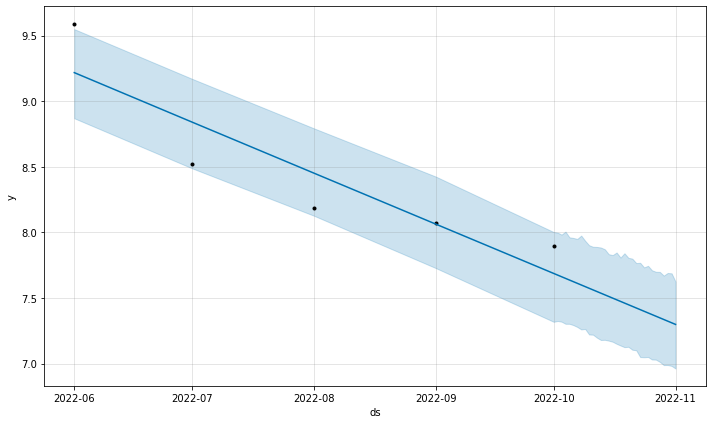

In [11]:
fig1 = m.plot(forecast)

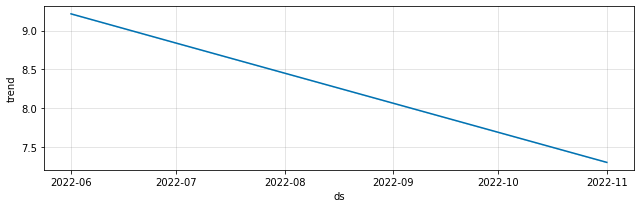

In [12]:
fig2 = m.plot_components(forecast)

In [114]:
test_list = [{"date" : "2022-06-01", "value" : 200000}, {"date" : "2022-07-01", "value" : 150000}, {"date" : "2022-08-01", "value" : 231000}]

In [110]:
# def

def seller_prophet(value_list): # value_list = [{date : 2022-02-01, value : (월 매출액)}, {date : 2022-03-01, value : (월 매출액)}]
    ds = []
    y = []
    m = Prophet()
    for value in value_list:
        ds.append(pd.to_datetime(value.get("date")))
        y.append(value.get("value"))

    s_ds = pd.Series(ds, name="ds")
    s_y = pd.Series(y, name="y")
    m.fit(pd.DataFrame(s_ds).join(s_y))

    future = m.make_future_dataframe(periods=31)
    forecast = m.predict(future)

    return int(forecast.tail(1)["yhat"].values)

In [115]:
value = seller_prophet(test_list)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 1.



Initial log joint probability = -8.71095
Iteration  1. Log joint probability =    1.75157. Improved by 10.4625.
Iteration  2. Log joint probability =    3.57571. Improved by 1.82413.
Iteration  3. Log joint probability =    4.43792. Improved by 0.862214.
Iteration  4. Log joint probability =    4.48626. Improved by 0.0483377.
Iteration  5. Log joint probability =    4.49648. Improved by 0.0102196.
Iteration  6. Log joint probability =    4.50061. Improved by 0.00413011.
Iteration  7. Log joint probability =    4.50158. Improved by 0.000976205.
Iteration  8. Log joint probability =    4.50167. Improved by 9.15476e-05.
Iteration  9. Log joint probability =    4.50171. Improved by 3.6607e-05.
Iteration 10. Log joint probability =    4.50173. Improved by 1.44565e-05.
Iteration 11. Log joint probability =    4.50173. Improved by 1.56266e-06.
Iteration 12. Log joint probability =    4.50173. Improved by 9.02724e-07.
Iteration 13. Log joint probability =    4.50173. Improved by 1.1433e-06.
I

In [117]:
value

225755